In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The linear Model

y = $X^T$.w + b

What this equation tells us is that the dot product of feature matrix `X` and weight vector `w` + the bias b will get us the response vector y

Let's take an example to refresh our mind of how this works in numbers.

In [2]:
#Example:
#You need for 5 years at the Egnineering School. The `cgpa` will be calculated based on the following formula
#firstYearGPA*(1/15) + SecondYearGPA*(2/15) + .....+FifthYearGPA*(5/15)

Let's say we have a student that has the followning gpa:

In [3]:
gpa = np.array([3.3,3.1,2.9,3.4,3.5])
gpa

array([3.3, 3.1, 2.9, 3.4, 3.5])

Can you calculate the `cgpa`


First, let's define our weights:

In [4]:
weights = np.array([1/15,2/15,3/15,4/15,5/15])
weights

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

> We want: 1/15 * 3.3 + 2/15 * 3.1 + 3.15 * 2.9 etc

Essentially to multiply each gpa with the asssocaited weght. To do this, we need the first rule in matrix multiplication, which dictates the shape of each vector. if we are performing A@B, and A shape is M * N , B shape has to be N * K, which is to say that the rows of B has to match the columns of A.

In [5]:
# let's check the shape of gpa
gpa.shape

(5,)

In [6]:
# we need to reshape gpa to be 1*5

gpa = gpa.reshape(1,5)
gpa

array([[3.3, 3.1, 2.9, 3.4, 3.5]])

In [7]:
gpa.shape

(1, 5)

In [8]:
# we need to reshape it to be 5*1

weights = weights.reshape(5,1)
weights

array([[0.06666667],
       [0.13333333],
       [0.2       ],
       [0.26666667],
       [0.33333333]])

In [9]:
# now to get the dot product of gpa and weights we use the @ symbol

gpa@weights

array([[3.28666667]])

> and this will be the final results for the student.

**Multi-inputs**

Now let's say we have more than one student. We can put the results of that student in the second column of gpa matrix. Note that the number of rows in gpa matrix doesn't require any change in the shape of the weights vector. Additionally, note that the change in the results will be reflected in the number of rows and not in the number of columns. Let's test this

In [10]:
#first, let's create the record of student b and then add it to the gpa matrix
student_b = np.array([3.1,2.5,2.6,2.8,2.9]).reshape(1,5)
gpa = np.vstack([gpa,student_b])
gpa

array([[3.3, 3.1, 2.9, 3.4, 3.5],
       [3.1, 2.5, 2.6, 2.8, 2.9]])

In [11]:
# now let's get the results for both students
gpa@weights

array([[3.28666667],
       [2.77333333]])

**Multi-ouputs**

We saw how changing the rows or the columns of X changes the output. But how about changing the type of output that we want? In our previous example we had one target which was the `cgpa`, what if we want to change the number of outputs to be more than one, say for example we want to have the `average` of grades in addition to the `cgpa`. In this case, we need to include another column in the weight matrix to connect with the average. So essentially the number of columns in `w` should be the same as the number of outputs.

In [12]:
weights = np.hstack([weights,np.array([1/5,1/5,1/5,1/5,1/5]).reshape(5,1)])
weights

array([[0.06666667, 0.2       ],
       [0.13333333, 0.2       ],
       [0.2       , 0.2       ],
       [0.26666667, 0.2       ],
       [0.33333333, 0.2       ]])

Now for each of the two students we have, we will calculate the avg in addition to the gpa



In [13]:
gpa@weights


array([[3.28666667, 3.24      ],
       [2.77333333, 2.78      ]])

This knowledge will come handy when we are dealing with NN that has many hidden layer with many units, for example let's say we have the second layer with 10 units, and the third layer 5 units, then the `w` matrix will be 10 by 5

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing(as_frame=True)
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target

In [32]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [68]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [69]:
X_trainscaled.shape

(16512, 8)

In [140]:
# let's take just one training example

x = X_trainscaled[0,:]
x

array([-0.36232605,  1.85890297, -0.16877334, -0.16841537, -0.4861138 ,
        0.00190139,  0.97229046, -1.42250942])

In [141]:
x.shape

(8,)

In [143]:
x = x.reshape(1,x.shape[0])
x

array([[-0.36232605,  1.85890297, -0.16877334, -0.16841537, -0.4861138 ,
         0.00190139,  0.97229046, -1.42250942]])

In [144]:
x.shape

(1, 8)

In [187]:
np.random.seed(500)
w = np.random.rand(x.shape[1],1)
b = np.zeros((x.shape[0],1))


In [188]:
w.shape

(8, 1)

In [189]:
b.shape

(1, 1)

In [190]:
x@w

array([[-0.37310667]])

In [191]:
import tensorflow as tf 



In [192]:
tf.matmul(x,w)

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-0.37310667]])>

In [193]:
y_predicted = tf.matmul(x,w)
y_predicted = y_predicted[:,0]

### How are we from the true values? 
> A Loss function

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [195]:
y

array([[2.556]])

In [196]:
#MSE: 
y = np.array(y_train.iloc[0]).reshape(1,1)

mse_loss = mean_squared_error(y,y_predicted)
print(mse_loss)
#MAE
mae_loss= mean_absolute_error(y,y_predicted)
print(mae_loss)

8.579665869538433
2.929106667490693


In [197]:
np.mean((y-y_predicted)**2)

8.579665869538433

### Where do we go from here, how we could reduce the loss function: 
> We need to update the values of the weights

> An Optimization algorithm: eg. gradient descent

new_w = old+w - step_size* dl/dw

OK, so we update `w` and then recalculate y_predicted again, but isn't this just like doing linear regression? In fact, yes. The model that we have been building so fart is just the linear regression model that we worked with before. We need to add the non-linearity part, which is the activation function


### Non-Linearity: Activation Function

In [198]:
np.tanh(tf.matmul(x,w),b)

array([[-0.35670609]])

In [199]:
np.tanh(tf.matmul(x,w),b).shape

(1, 1)

In [219]:
def nn_predict(x_,w_,b_): # x is a vector, W is a matrix
    return np.tanh(tf.matmul(x_,w_),b_)

In [220]:
nn_predict(x,w,b)

array([[-0.35670609]])

### Adding More Layers: Deep learning through successive layers of representations

In [221]:
# hiddern layer # 1: 4 nerons
# w is 8 by 4
w_layer1 = np.random.rand(x.shape[1],4)
w_layer1 

array([[0.75229122, 0.34356289, 0.98992503, 0.59126413],
       [0.20872419, 0.78217238, 0.81550818, 0.68943253],
       [0.67106866, 0.79964554, 0.97930659, 0.34302835],
       [0.99365903, 0.35096132, 0.99344011, 0.57827583],
       [0.73761211, 0.72090651, 0.83583666, 0.50985741],
       [0.76070682, 0.23528407, 0.62403248, 0.96325899],
       [0.28658617, 0.03398406, 0.26462831, 0.93597975],
       [0.86613266, 0.53960503, 0.1130371 , 0.90996047]])

![](assets/hidden_layer1.jpg)

In [222]:
b_layer1 = np.zeros((x.shape[0],4))

In [223]:
ouput_layer1 = nn_predict(x,w_layer1,b_layer1)
ouput_layer1 

array([[-0.90066613,  0.05084468,  0.4746515 ,  0.27445263]])

In [224]:
w_final = np.random.rand(ouput_layer1 .shape[1],1)

w_final

array([[0.92228272],
       [0.77735803],
       [0.69207328],
       [0.23343467]])

In [226]:
b_final = np.zeros((ouput_layer1.shape[0],1))
ouput_final= nn_predict(ouput_layer1 ,w_final,b_final)
ouput_final

array([[-0.37873665]])

In [260]:
model = tf.keras.Sequential()
# setting the input shape to be the number of features
model.add(tf.keras.layers.Dense(4, input_shape=(x.shape[1],),activation='tanh'))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(1))

In [261]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 36        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [262]:
x.shape

(1, 8)

In [264]:
# let's do a prediction without even fitting on the data

In [265]:
model.predict(x)

1/1 [==============================] - 0s 17ms/step


array([[0.35975972]], dtype=float32)

The model is built, now we need to configure the training procedure using the Keras Model.compile method

In [266]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error')

In [268]:
%%time
history = model.fit(
    X_trainscaled,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

/Users/mosal/Downloads/ENTER/envs/deepleanring/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


CPU times: user 34.4 s, sys: 3.52 s, total: 37.9 s
Wall time: 30.2 s


In [269]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.404761,0.410282,95
96,0.404364,0.424547,96
97,0.405156,0.418673,97
98,0.404610,0.407749,98
99,0.404219,0.413707,99


In [280]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

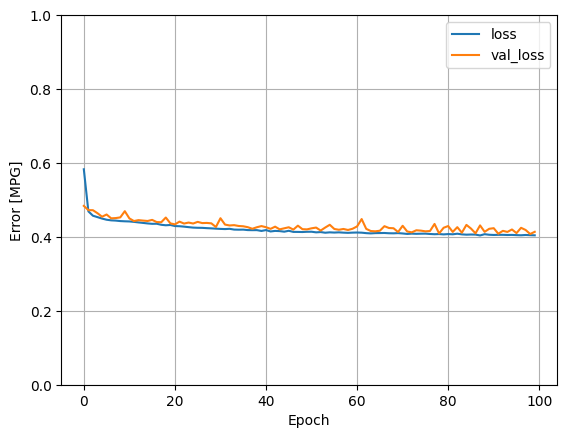

In [281]:
plot_loss(history)


In [282]:
y = model.predict(X_testscaled)


129/129 [==============================] - 0s 691us/step


In [284]:
y

array([[2.7515619],
       [0.7212727],
       [2.0038297],
       ...,
       [2.2462063],
       [2.412369 ],
       [1.0967114]], dtype=float32)

In [285]:
y_test

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
2319     0.682
5341     2.250
16888    3.500
6823     2.273
11878    1.417
Name: MedHouseVal, Length: 4128, dtype: float64